## TMDB Box Office Prediction

In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
train_dataset_org = pd.read_csv("TMDB_Box_Office_Prediction_dataset(Kaggle)/train.csv",index_col=0)
test_dataset = pd.read_csv("TMDB_Box_Office_Prediction_dataset(Kaggle)/test.csv",index_col=0)

In [7]:
train_dataset_org.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [8]:
train_dataset_org.shape

(3000, 22)

In [9]:
train_dataset_org[['poster_path','production_companies','production_countries','spoken_languages']]

,poster_path,production_companies,production_countries,spoken_languages
id,,,,
1,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
2,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
3,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
4,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso..."
5,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]","[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]"
6,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,NaN,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]"
7,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"
8,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,NaN,NaN,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso..."
9,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'iso_639_1': 'en', 'name': 'English'}]"


In [10]:
train_dataset_org.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords                 2724 non-null object
cast                

In [11]:
"""Features to be removed:
1)belongs to collection 2)homepage 3)imdb_id 4)original_title 5)overview 6)poster_path 7)spoken_languages 8)status 9)tagline 10)title 11)keywords 12)cast 13)crew 
"""

train_dataset=train_dataset_org.drop(['belongs_to_collection','homepage','imdb_id','original_title','overview','poster_path','spoken_languages','status','tagline','title','Keywords','cast','crew'],axis=1)

In [12]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 9 columns):
budget                  3000 non-null int64
genres                  2993 non-null object
original_language       3000 non-null object
popularity              3000 non-null float64
production_companies    2844 non-null object
production_countries    2945 non-null object
release_date            3000 non-null object
runtime                 2998 non-null float64
revenue                 3000 non-null int64
dtypes: float64(2), int64(2), object(5)
memory usage: 234.4+ KB


### Modifying the Categorical attributes

In [13]:
def id_extractor(inp):
    nums=[]
    i=0
    while i<len(str(inp)):
        if str(inp)[i] in "1234567890":
            temp=""
            while str(inp)[i]!=',':
                temp+=str(inp)[i]
                i+=1
            #nums.append(int(temp))
            nums.append(str(temp))
        i+=1
    return nums

In [14]:
genres_id=set()
for movie in train_dataset.genres:
    ls=id_extractor(movie)
    for elements in ls:
        genres_id.add(elements)
print(len(genres_id))
genres_id

20


{'10402',
 '10749',
 '10751',
 '10752',
 '10769',
 '10770',
 '12',
 '14',
 '16',
 '18',
 '27',
 '28',
 '35',
 '36',
 '37',
 '53',
 '80',
 '878',
 '9648',
 '99'}

In [15]:
train_dataset['original_language'].value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
fa       5
da       5
ro       4
hu       3
tr       3
fi       2
ml       2
te       2
pl       2
no       2
ar       1
cs       1
he       1
sr       1
bn       1
mr       1
vi       1
id       1
ur       1
nb       1
el       1
Name: original_language, dtype: int64

In [16]:
def modified_id_extractor(inp):
    nums=[]
    i=0
    while i<len(str(inp)):
        if str(inp)[i] in "1234567890":
            temp=""
            while str(inp)[i]!='}':
                temp+=str(inp)[i]
                i+=1
            nums.append(int(temp))
        i+=1
    return nums

In [17]:
# prod_comp=set()
# for movie in train_dataset.production_companies:
#     ls=modified_id_extractor(movie)
#     for elements in ls:
#         prod_comp.add(elements)
# print(len(prod_comp))
# prod_comp

In [18]:
train_dataset['production_companies'].value_counts()

[{'name': 'Paramount Pictures', 'id': 4}]                                                                                                                                                                                                                                                                                                                        51
[{'name': 'Universal Pictures', 'id': 33}]                                                                                                                                                                                                                                                                                                                       36
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                                                                                                                                                                          

In [19]:
pd.get_dummies(train_dataset['production_countries'])

,"[{'iso_3166_1': 'AE', 'name': 'United Arab Emirates'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]","[{'iso_3166_1': 'AR', 'name': 'Argentina'}, {'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'ES', 'name': 'Spain'}]","[{'iso_3166_1': 'AR', 'name': 'Argentina'}, {'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'IT', 'name': 'Italy'}]","[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'iso_3166_1': 'DE', 'name': 'Germany'}]","[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'iso_3166_1': 'FR', 'name': 'France'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]","[{'iso_3166_1': 'AT', 'name': 'Austria'}, {'iso_3166_1': 'HU', 'name': 'Hungary'}]","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'CN', 'name': 'China'}, {'iso_3166_1': 'HK', 'name': 'Hong Kong'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",...,"[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'NZ', 'name': 'New Zealand'}, {'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'IL', 'name': 'Israel'}, {'iso_3166_1': 'JP', 'name': 'Japan'}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'NZ', 'name': 'New Zealand'}, {'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'ZA', 'name': 'South Africa'}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'PH', 'name': 'Philippines'}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'RU', 'name': 'Russia'}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'ZA', 'name': 'South Africa'}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]","[{'iso_3166_1': 'UY', 'name': 'Uruguay'}, {'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'PY', 'name': 'Paraguay'}]","[{'iso_3166_1': 'ZA', 'name': 'South Africa'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]","[{'iso_3166_1': 'ZA', 'name': 'South Africa'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]","[{'iso_3166_1': 'ZA', 'name': 'South Africa'}]"
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
train_dataset['production_companies'].value_counts()

[{'name': 'Paramount Pictures', 'id': 4}]                                                                                                                                                                                                                                                                                                                        51
[{'name': 'Universal Pictures', 'id': 33}]                                                                                                                                                                                                                                                                                                                       36
[{'name': 'Warner Bros.', 'id': 6194}]                                                                                                                                                                                                                                                          

In [21]:
train_dataset.drop(['production_companies','production_countries','release_date'],axis=1,inplace=True)

In [22]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 6 columns):
budget               3000 non-null int64
genres               2993 non-null object
original_language    3000 non-null object
popularity           3000 non-null float64
runtime              2998 non-null float64
revenue              3000 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 164.1+ KB


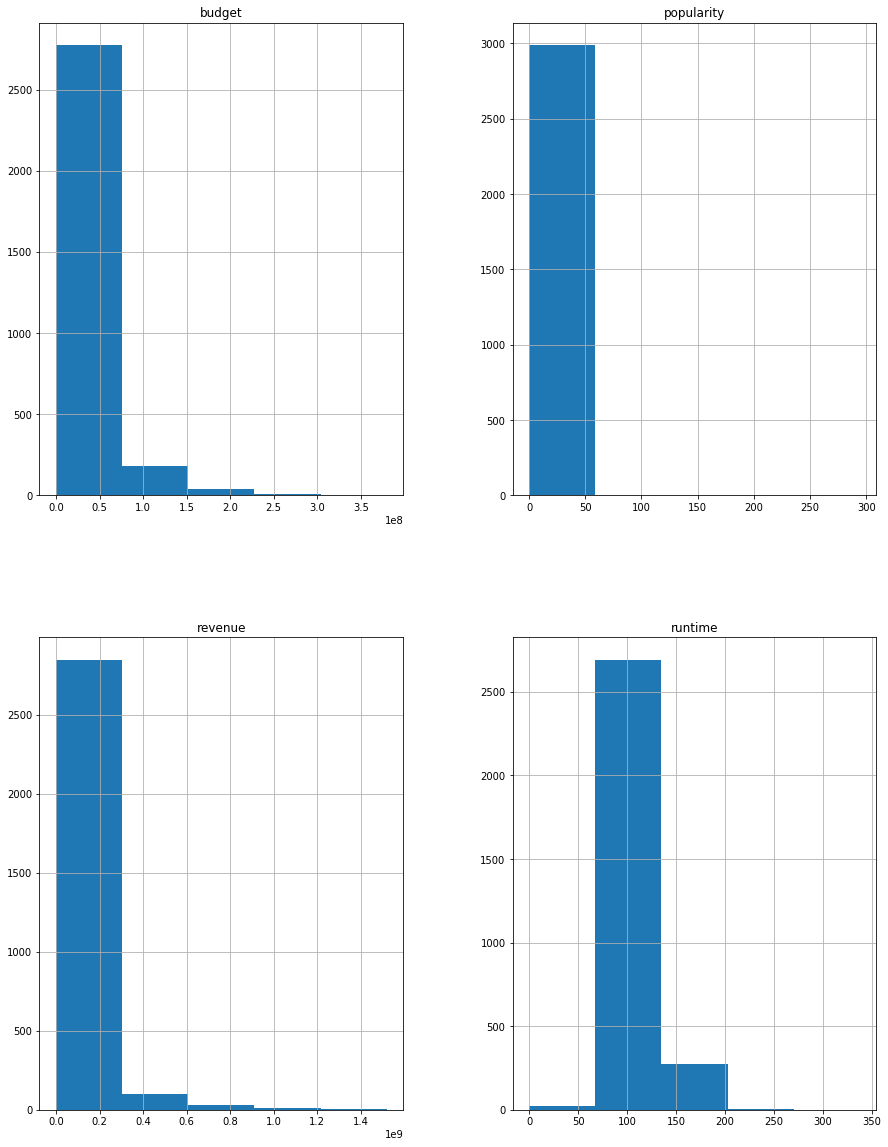

In [23]:
train_dataset.hist(bins=5,figsize=(15,20))
plt.show()

### First trying the straight-off method without modifying the dataset

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train_set , test_set = train_test_split(train_dataset,test_size=0.3,random_state=42)

In [26]:
corr_matrix = train_set.corr()

In [27]:
corr_matrix['revenue'].sort_values(ascending=False)

revenue       1.000000
budget        0.763278
popularity    0.464442
runtime       0.227590
Name: revenue, dtype: float64

In [28]:
train_set_x=train_set.drop(['revenue'],axis=1)
train_set_y=train_set['revenue'].copy()

In [29]:
train_set_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 612 to 861
Data columns (total 5 columns):
budget               2100 non-null int64
genres               2095 non-null object
original_language    2100 non-null object
popularity           2100 non-null float64
runtime              2098 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 98.4+ KB


### First Extracting and Preprocessing the Numerical features

In [30]:
train_set_x_numerical=train_set_x.drop(['genres','original_language'],axis=1)

In [31]:
train_set_x_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 612 to 861
Data columns (total 3 columns):
budget        2100 non-null int64
popularity    2100 non-null float64
runtime       2098 non-null float64
dtypes: float64(2), int64(1)
memory usage: 65.6 KB


In [32]:
from sklearn.preprocessing import Imputer

In [33]:
imputer=Imputer(strategy="median")

C:\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [34]:
#Final array of numerical features
train_set_x_numerical_arr=imputer.fit_transform(train_set_x_numerical)

In [35]:
train_set_x_numerical_arr

array([[8.5750000e+06, 1.6727405e+01, 1.4500000e+02],
       [4.1000000e+06, 3.8262810e+00, 1.3500000e+02],
       [8.0000000e+07, 1.4398530e+01, 1.1800000e+02],
       ...,
       [0.0000000e+00, 7.6837200e+00, 9.6000000e+01],
       [2.4000000e+07, 4.2330810e+00, 1.3400000e+02],
       [2.4000000e+07, 4.1975440e+00, 8.9000000e+01]])

In [36]:
train_set_x_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 612 to 861
Data columns (total 3 columns):
budget        2100 non-null int64
popularity    2100 non-null float64
runtime       2098 non-null float64
dtypes: float64(2), int64(1)
memory usage: 65.6 KB


### Preprocessing the Categorical features

In [37]:
train_set_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 612 to 861
Data columns (total 5 columns):
budget               2100 non-null int64
genres               2095 non-null object
original_language    2100 non-null object
popularity           2100 non-null float64
runtime              2098 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 98.4+ KB


In [38]:
train_set_x_genres =  pd.DataFrame(train_set_x['genres'])

In [39]:
train_set_x_genres

,genres
id,
612,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n..."
531,"[{'id': 18, 'name': 'Drama'}]"
2788,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
50,"[{'id': 878, 'name': 'Science Fiction'}, {'id'..."
1884,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ..."
1012,"[{'id': 10749, 'name': 'Romance'}, {'id': 37, ..."
859,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name..."
1018,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n..."
49,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name..."


In [40]:
from sklearn.preprocessing import MultiLabelBinarizer

In [41]:
class genres_extractor():
    
    def __init__(self,dataset):
        self.dataset = dataset
        self.genres = set()
    
    def genres_count(self):
        for movie in self.dataset.genres:
            ls=id_extractor(movie)
            for elements in ls:
                self.genres.add(elements)
        print(self.genres)
        print("Genres are : " + str(len(self.genres)))
    
    def genres_generate(self):
        new = pd.DataFrame(index=self.dataset.index,columns=['genres_id'])
        #This loop gives a final dataframe new with the genres_id and index
        for index in self.dataset.index:
            ls=tuple(id_extractor(self.dataset.genres[index]))
            new.set_value(index,col='genres_id',value=ls)
        #Now convert the dataframe into numpy array for multilabel binarizer
        self.mlb = MultiLabelBinarizer()
        new_array = np.array(new).reshape(new.shape[0])
        trans_new = self.mlb.fit_transform(new_array)
        df_trans_new = pd.DataFrame(trans_new,index=self.dataset.index,columns=self.mlb.classes_)
        return df_trans_new
    
    def genres_transform(self,test_dataset):
        new = pd.DataFrame(index=test_dataset.index,columns=['genres_id'])
        for index in test_dataset.index:
            ls=tuple(id_extractor(test_dataset.genres[index]))
            new.set_value(index,col='genres_id',value=ls)
        new_array = np.array(new).reshape(new.shape[0])
        trans_new = self.mlb.transform(new_array)
        df_trans_new = pd.DataFrame(trans_new,index=test_dataset.index,columns=self.mlb.classes_)
        return df_trans_new

In [42]:
t=genres_extractor(train_set_x)
t.genres_count()

{'27', '36', '16', '99', '10769', '10402', '878', '10770', '10751', '18', '9648', '37', '12', '28', '10749', '14', '80', '10752', '35', '53'}
Genres are : 20


In [43]:
t.genres_generate()

C:\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,10402,10749,10751,10752,10769,10770,12,14,16,18,27,28,35,36,37,53,80,878,9648,99
id,,,,,,,,,,,,,,,,,,,,
612,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
531,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2788,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
50,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1884,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
859,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1018,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
49,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0


In [44]:
t.genres_transform(test_set)

C:\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\__main__.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


,10402,10749,10751,10752,10769,10770,12,14,16,18,27,28,35,36,37,53,80,878,9648,99
id,,,,,,,,,,,,,,,,,,,,
1802,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1191,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1818,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
252,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2506,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
1118,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1412,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2114,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
409,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [45]:
train_set_genres = genres_extractor(train_set_x)

In [46]:
train_set_x_genres = train_set_genres.genres_generate()

C:\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\__main__.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [47]:
train_set_x_original_language = pd.DataFrame(train_set_x['original_language'])

In [48]:
train_set_x_original_language.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2100 entries, 612 to 861
Data columns (total 1 columns):
original_language    2100 non-null object
dtypes: object(1)
memory usage: 112.8+ KB


In [49]:
train_set_x_original_language['original_language'].value_counts()

en    1797
fr      53
ru      38
hi      29
ja      28
es      25
ko      17
it      16
de      15
zh      15
ta      13
cn      10
sv       6
pt       5
da       4
ro       4
nl       4
ml       2
fa       2
fi       2
te       2
pl       2
he       1
ar       1
bn       1
sr       1
ur       1
mr       1
vi       1
hu       1
no       1
nb       1
el       1
Name: original_language, dtype: int64

In [50]:
temp=np.array(train_set_x_original_language)

In [51]:
temp

array([['ko'],
       ['en'],
       ['en'],
       ...,
       ['en'],
       ['en'],
       ['en']], dtype=object)

In [52]:
mlb_origial_lang= MultiLabelBinarizer()

In [53]:
mlb_origial_lang.fit(temp)

MultiLabelBinarizer(classes=None, sparse_output=False)

In [54]:
test=mlb_origial_lang.transform(temp)

In [55]:
mlb_origial_lang.classes_

array(['ar', 'bn', 'cn', 'da', 'de', 'el', 'en', 'es', 'fa', 'fi', 'fr',
       'he', 'hi', 'hu', 'it', 'ja', 'ko', 'ml', 'mr', 'nb', 'nl', 'no',
       'pl', 'pt', 'ro', 'ru', 'sr', 'sv', 'ta', 'te', 'ur', 'vi', 'zh'],
      dtype=object)

In [56]:
class lang_extractor():
    def __init__(self,dataset):
        self.dataset=dataset
    
    def lang_extract(self):
        lang_df = pd.DataFrame(self.dataset.original_language)
        temp_arr = np.array(lang_df)
        self.mlb=MultiLabelBinarizer()
        trans_new=self.mlb.fit_transform(temp_arr)
        df_trans_new = pd.DataFrame(trans_new,index=self.dataset.index,columns=self.mlb.classes_)
        return df_trans_new
    
    def lang_traform(self,test_dataset):
        lang_df = pd.DataFrame(test_dataset.original_language)
        temp_arr = np.array(lang_df)
        trans_new=self.mlb.transform(temp_arr)
        df_trans_new = pd.DataFrame(trans_new,index=test_dataset.index,columns=self.mlb.classes_)
        return df_trans_new

In [57]:
l=lang_extractor(train_set_x)
l.lang_extract()

,ar,bn,cn,da,de,el,en,es,fa,fi,...,pt,ro,ru,sr,sv,ta,te,ur,vi,zh
id,,,,,,,,,,,,,,,,,,,,,
612,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
531,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2788,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
l.lang_traform(test_set)

C:\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\preprocessing\label.py:930: UserWarning: unknown class(es) ['cs', 'id', 'tr'] will be ignored
  .format(sorted(unknown, key=str)))


,ar,bn,cn,da,de,el,en,es,fa,fi,...,pt,ro,ru,sr,sv,ta,te,ur,vi,zh
id,,,,,,,,,,,,,,,,,,,,,
1802,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1191,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2506,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1118,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1412,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2114,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
409,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
test_set

,budget,genres,original_language,popularity,runtime,revenue
id,,,,,,
1802,3500000,"[{'id': 35, 'name': 'Comedy'}]",en,0.556435,90.0,9247881
1191,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",en,2.087446,100.0,7
1818,2000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",it,1.188935,89.0,33700
252,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",en,7.284477,119.0,10017322
2506,0,"[{'id': 10752, 'name': 'War'}, {'id': 14, 'nam...",en,1.218959,101.0,8910819
1118,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",en,12.520688,114.0,141069860
1412,13000000,"[{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...",en,8.611077,94.0,68572378
2114,9000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",en,6.842274,119.0,25000000
409,10000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",en,15.109261,90.0,40485039


In [60]:
train_set_original_language = lang_extractor(train_set_x)
train_set_x_original_language = train_set_original_language.lang_extract()

### Feature Scaling on the Numerical Attributes

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
std_scaler = StandardScaler()

In [63]:
train_set_x_numerical_arr=std_scaler.fit_transform(train_set_x_numerical_arr)

In [64]:
train_set_x_numerical_arr

array([[-0.35726586,  0.69030363,  1.70695739],
       [-0.47588978, -0.37948385,  1.25090007],
       [ 1.53607798,  0.49718858,  0.47560263],
       ...,
       [-0.58457315, -0.05961715, -0.52772347],
       [ 0.05162219, -0.34575116,  1.20529434],
       [ 0.05162219, -0.34869796, -0.84696359]])

In [65]:
train_set_x_df = pd.DataFrame(train_set_x_numerical_arr,columns=train_set_x_numerical.columns,index=train_set_x.index)

In [66]:
train_set_x_df

,budget,popularity,runtime
id,,,
612,-0.357266,0.690304,1.706957
531,-0.475890,-0.379484,1.250900
2788,1.536078,0.497189,0.475603
50,0.422736,-0.024625,0.475603
1884,0.210671,-0.045193,0.338785
1012,-0.584573,0.081463,0.338785
859,-0.326119,0.247494,-0.390906
1018,0.131147,0.102940,0.065151
49,-0.584573,0.048237,-0.618935


In [67]:
train_set_x_df=train_set_x_df.join(train_set_x_original_language)

In [68]:
train_set_x_df=train_set_x_df.join(train_set_x_genres)

### Training and Evaluation of Model

In [69]:
from sklearn.svm import SVC

In [70]:
linear_svr = SVC(kernel="linear")

In [71]:
train_set_x_df

,budget,popularity,runtime,ar,bn,cn,da,de,el,en,...,27,28,35,36,37,53,80,878,9648,99
id,,,,,,,,,,,,,,,,,,,,,
612,-0.357266,0.690304,1.706957,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
531,-0.475890,-0.379484,1.250900,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2788,1.536078,0.497189,0.475603,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
50,0.422736,-0.024625,0.475603,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1884,0.210671,-0.045193,0.338785,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1012,-0.584573,0.081463,0.338785,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
859,-0.326119,0.247494,-0.390906,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1018,0.131147,0.102940,0.065151,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,1,0
49,-0.584573,0.048237,-0.618935,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [72]:
train_set_y

id
612        1983204
531       36000000
2788     157107755
50       120000000
1884      17137302
1012      41410568
859         558000
1018      29000000
49          653951
720         190000
2391      10000000
2653      11000000
2247       4417667
1160     147332697
633       30102717
1339       7070330
2128      93375151
2603        538000
1437       1100000
26         8403433
2966     441809770
220        3166000
2819       9317021
277       14000000
2158      52287414
1481       5000000
1236       7644937
1594      92374674
1000         17808
2141       4291965
           ...    
1083        985007
475        6500000
2905      16491080
748       11122090
2301       8176544
22        36690067
460       25405445
1185     307166834
2325     132274484
956        1832541
1216       9930095
2434            32
2854       9190819
1516      84785914
2392     141195658
770        4192440
1686     159330280
131        9800000
2920      13000000
2136    1045713802
1483      62022014
331      

In [73]:
linear_svr.fit(train_set_x_df,train_set_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
train_set_pred=pd.DataFrame(linear_svr.predict(train_set_x_df),index=train_set_x.index)

In [75]:
train_set_pred

,0
id,
612,1983204
531,10400000
2788,157107755
50,120000000
1884,17137302
1012,4905000
859,8500000
1018,29000000
49,3000000


In [76]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [77]:
accuracy_score(train_set_y,train_set_pred)

0.6090476190476191

In [78]:
linear_svr.score(train_set_x_df,train_set_y)

0.6090476190476191

### Pipeline to Transform Test Dataset

In [79]:
def test_set_preprocessing(test_set):
    if 'revenue' in test_set.columns:
        test_set_y = pd.DataFrame(test_set['revenue'],index=test_set.index)    
        test_set_num = test_set.drop(['genres','original_language','revenue'],axis=1)
        test_set_num_arr = imputer.transform(test_set_num)
        test_set_num_arr = std_scaler.transform(test_set_num_arr)
        test_set_cp = pd.DataFrame(test_set_num_arr,columns=test_set_num.columns,index=test_set.index)
        genres=train_set_original_language.lang_traform(test_set)
        original_language=train_set_genres.genres_transform(test_set)
        test_set_cp = test_set_cp.join(genres)
        test_set_cp = test_set_cp.join(original_language)
        
        return test_set_y,test_set_cp

    else:
        test_set_num = test_set.drop(['revenue'],axis=1)
        test_set_y = pd.DataFrame(test_set['revenue'],index=test_set.index)    
        test_set_num = test_set.drop(['genres','original_language'],axis=1)
        test_set_num_arr = imputer.transform(test_set_num)
        test_set_num_arr = std_scaler.transform(test_set_num_arr)
        test_set_cp = pd.DataFrame(test_set_num_arr,columns=test_set_num.columns,index=test_set.index)
        genres=train_set_original_language.lang_traform(test_set)
        original_language=train_set_genres.genres_transform(test_set)
        test_set_cp = test_set_cp.join(genres)
        test_set_cp = test_set_cp.join(original_language)
        
        return test_set_cp

In [80]:
test_set_y,test_set_x_df = test_set_preprocessing(test_set)

C:\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\preprocessing\label.py:930: UserWarning: unknown class(es) ['cs', 'id', 'tr'] will be ignored
  .format(sorted(unknown, key=str)))
C:\Anaconda3\envs\gpu_env\lib\site-packages\ipykernel\__main__.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [81]:
test_set_pred=pd.DataFrame(linear_svr.predict(test_set_x_df),index=test_set.index)

In [82]:
test_set_pred

,0
id,
1802,10000000
1191,39300000
1818,13983
252,72178895
2506,6193901
1118,285176741
1412,12000000
2114,28744356
409,495303


In [83]:
linear_svr.score(test_set_x_df,test_set_y)

0.0

### Random Forest using Train Test Split

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [85]:
rf = RandomForestRegressor()

In [86]:
rf.fit(train_set_x_df,train_set_y)

C:\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [87]:
rf.score(train_set_x_df,train_set_y)

0.9333698512143302

In [88]:
rf.score(test_set_x_df,test_set_y)

0.6443787314729492

### Random Forest using Cross Validation

#### Remember : Cross validation is done on entire dataset without fitting the model

In [106]:
#Making Scikit-Pipeline
from sklearn.pipeline import Pipeline

In [95]:
train_set_cross_val_x = train_dataset.drop(['revenue'],axis=1)

In [99]:
train_set_cross_val_x.shape

(3000, 5)

In [101]:
train_set_cross_val_y = train_dataset['revenue'].copy()

In [104]:
train_set_cross_val_y.shape

(3000,)

In [109]:
from sklearn.base import BaseEstimator,TransformerMixin

In [110]:
class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [112]:
num_attribs = list(train_set_x_numerical)

In [116]:
num_pipeline = Pipeline([('selector',DataFrameSelector(num_attribs)),
                         ('imputer',Imputer(strategy='median')),
                         ('std_scaler',StandardScaler())])

C:\Anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [153]:
class GenresExtractor(BaseEstimator,TransformerMixin):
    
    def fit(self,X,y=None):
        new = pd.DataFrame(index=X.index,columns=['genres_id'])
        #This loop gives a final dataframe new with the genres_id and index
        for index in X.index:
            ls=tuple(id_extractor(X.genres[index]))
            new.set_value(index,col='genres_id',value=ls)
        #Now convert the dataframe into numpy array for multilabel binarizer
        self.mlb = MultiLabelBinarizer()
        new_array = np.array(new).reshape(new.shape[0])
        trans_new = self.mlb.fit(new_array)
        return self
    
    def transform(self,X):
        new = pd.DataFrame(index=X.index,columns=['genres_id'])
        for index in X.index:
            ls=tuple(id_extractor(X.genres[index]))
            new.set_value(index,col='genres_id',value=ls)
        new_array = np.array(new).reshape(new.shape[0])
        trans_new = self.mlb.transform(new_array)
        return trans_new
#         df_trans_new = pd.DataFrame(trans_new,index=test_dataset.index,columns=self.mlb.classes_)
#         return df_trans_new

In [159]:
genres_pipeline = Pipeline([('selector',DataFrameSelector(['genres'])),
                           'extractor',GenresExtractor()])

TypeError: zip argument #3 must support iteration